# Data from Top200 SpotifyCharts


Proceso:
 - Sacar top200 de 2017, 2018, 2019 y 2010
 - De canciones duplicadas sumar los Streams y unir, quitar duplicados
 - Juntar Dataframes de años y añadir una nueva columna con el mismo.


## Preparación

In [ ]:
# Help: https://github.com/kelvingakuo/fycharts#in
#! pip install fycharts

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from datetime import date

#Fechas 2020
fecha_fin_2020 = '2020-05-13' # Empieza a levantarse restricciones de salida
fecha_inicial_2020 = '2020-03-14' #14 Marzo se decreta el estado de alarma, con 5753 casos y 136 fallecidos
fecha_fin2_2020 = datetime.strptime(fecha_fin_2020, '%Y-%m-%d')
fecha_inicial2_2020 = datetime.strptime(fecha_inicial_2020, '%Y-%m-%d')

#Fechas 2019
fecha_fin_2019 = '2019-05-13'
fecha_inicial_2019 = '2019-03-14'
fecha_fin2_2019 = datetime.strptime(fecha_fin_2019, '%Y-%m-%d')
fecha_inicial2_2019 = datetime.strptime(fecha_inicial_2019, '%Y-%m-%d')

print('Días totales seleccionados 2020:', fecha_fin2_2020 - fecha_inicial2_2020)
print('Días totales seleccionados 2019:', fecha_fin2_2019 - fecha_inicial2_2019)

Días totales seleccionados 2020: 60 days, 0:00:00
Días totales seleccionados 2019: 60 days, 0:00:00


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# ¡IMPORTANTE! Ejecutar una única vez para descargar los datos, configurado para España
'''
# Descarga año 2020
from fycharts.SpotifyCharts import SpotifyCharts
import sqlalchemy

api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///spotifycharts_2020.db", echo=False)
api.top200Daily(output_file = "top_200_daily_2020.csv", output_db = connector, webhook = "https://mywebhookssite.com/post/", 
                start = fecha_inicial_2020, end = fecha_fin_2020, region = ["es"])


# Descarga año 2019
from fycharts.SpotifyCharts import SpotifyCharts
import sqlalchemy

api = SpotifyCharts()
connector = sqlalchemy.create_engine("sqlite:///spotifycharts_2019.db", echo=False)
api.top200Daily(output_file = "top_200_daily_2019.csv", output_db = connector, webhook = "https://mywebhookssite.com/post/", 
                start = fecha_inicial_2019, end = fecha_fin_2019, region = ["es"])
'''

'\n# Descarga año 2020\nfrom fycharts.SpotifyCharts import SpotifyCharts\nimport sqlalchemy\n\napi = SpotifyCharts()\nconnector = sqlalchemy.create_engine("sqlite:///spotifycharts_2020.db", echo=False)\napi.top200Daily(output_file = "top_200_daily_2020.csv", output_db = connector, webhook = "https://mywebhookssite.com/post/", \n                start = fecha_inicial_2020, end = fecha_fin_2020, region = ["es"])\n\n\n# Descarga año 2019\nfrom fycharts.SpotifyCharts import SpotifyCharts\nimport sqlalchemy\n\napi = SpotifyCharts()\nconnector = sqlalchemy.create_engine("sqlite:///spotifycharts_2019.db", echo=False)\napi.top200Daily(output_file = "top_200_daily_2019.csv", output_db = connector, webhook = "https://mywebhookssite.com/post/", \n                start = fecha_inicial_2019, end = fecha_fin_2019, region = ["es"])\n'

## Importar la tabla

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos la tabla con los datos y miramos a ver qué tal están
data_top200_2020= pd.read_csv("/content/drive/My Drive/REPOS-Github/spotify-musicanalysis-coronavirus/top_200_daily_2020.csv")
data_top200_2019= pd.read_csv("/content/drive/My Drive/REPOS-Github/spotify-musicanalysis-coronavirus/top_200_daily_2019.csv")
# data_top200_2020= pd.read_csv("top_200_daily_2020.csv")
#data_top200_2019= pd.read_csv("top_200_daily_2019.csv")
print(data_top200_2020.isnull().sum())
print('2020:', data_top200_2020.shape)
print('2019:',data_top200_2019.shape)
data_top200_2020.head()

Position      0
Track Name    0
Artist        0
Streams       0
date          0
region        0
spotify_id    0
dtype: int64
2020: (12200, 7)
2019: (12200, 7)


,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1,Tusa,KAROL G,446086,2020-03-14,es,7k4t7uLgtOxPwTpFmtJNTY
1,2,La Difícil,Bad Bunny,399788,2020-03-14,es,6NfrH0ANGmgBXyxgV2PeXt
2,3,Tattoo,Rauw Alejandro,380503,2020-03-14,es,7na7Bk98usp84FaOJFPv3d
3,4,Diosa,Myke Towers,336910,2020-03-14,es,3JHpk0DOTOzyh0777JFAky
4,5,Rojo,J Balvin,327388,2020-03-14,es,4uziEsK1yiqdauKVDPsmVG


In [ ]:
# Importamos con las columnas que nos interesan
data_top200_2020 = pd.read_csv("/content/drive/My Drive/REPOS-Github/spotify-musicanalysis-coronavirus/top_200_daily_2020.csv", parse_dates= ["date"], usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
data_top200_2019 = pd.read_csv("/content/drive/My Drive/REPOS-Github/spotify-musicanalysis-coronavirus/top_200_daily_2019.csv", parse_dates= ["date"], usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
# data_top200_2020 = pd.read_csv("top_200_daily_2020.csv", parse_dates= ["date"], usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
# data_top200_2019 = pd.read_csv("top_200_daily_2019.csv", parse_dates= ["date"], usecols=['Position','Track Name', 'Artist', 'date', 'Streams', 'date', 'spotify_id'])
#Meto el año en nueva columnas columnas
data_top200_2020['year'] = pd.DatetimeIndex(data_top200_2020['date']).year
data_top200_2019['year'] = pd.DatetimeIndex(data_top200_2019['date']).year

#Concateno los datos de los dos años
data_top200 = pd.concat([data_top200_2020, data_top200_2019], axis=0,)

print(data_top200.dtypes)
print(data_top200.nunique()) # Ojo, debería haber el mismo número de Track Names y spotify ID!!
print(data_top200.shape)

Position               int64
Track Name            object
Artist                object
Streams                int64
date          datetime64[ns]
spotify_id            object
year                   int64
dtype: object
Position        200
Track Name      738
Artist          297
Streams       20942
date            122
spotify_id      807
year              2
dtype: int64
(24400, 7)


In [ ]:
data_top200.loc[data_top200['spotify_id'] == '6NfrH0ANGmgBXyxgV2PeXt']

,Position,Track Name,Artist,Streams,date,spotify_id,year
1,2,La Difícil,Bad Bunny,399788,2020-03-14,6NfrH0ANGmgBXyxgV2PeXt,2020
201,2,La Difícil,Bad Bunny,372705,2020-03-15,6NfrH0ANGmgBXyxgV2PeXt,2020
401,2,La Difícil,Bad Bunny,389384,2020-03-16,6NfrH0ANGmgBXyxgV2PeXt,2020
601,2,La Difícil,Bad Bunny,390067,2020-03-17,6NfrH0ANGmgBXyxgV2PeXt,2020
801,2,La Difícil,Bad Bunny,392738,2020-03-18,6NfrH0ANGmgBXyxgV2PeXt,2020
...,...,...,...,...,...,...,...
11217,18,La Difícil,Bad Bunny,165292,2020-05-09,6NfrH0ANGmgBXyxgV2PeXt,2020
11426,27,La Difícil,Bad Bunny,151313,2020-05-10,6NfrH0ANGmgBXyxgV2PeXt,2020
11628,29,La Difícil,Bad Bunny,166240,2020-05-11,6NfrH0ANGmgBXyxgV2PeXt,2020
11828,29,La Difícil,Bad Bunny,143671,2020-05-12,6NfrH0ANGmgBXyxgV2PeXt,2020


In [ ]:
# Agrupar sumas y convertir en Dataframe
data_top200_sumastreams = data_top200.groupby('spotify_id')['Streams'].sum()
data_top200_sumastreams = pd.DataFrame({'spotify_id':data_top200_sumastreams.index, 'Streams':data_top200_sumastreams.values})
print(data_top200_sumastreams.shape)
data_top200_sumastreams.head()

(807, 2)


,spotify_id,Streams
0,00ZBADBKZGwnzGIAA6U9Fb,44107
1,017PF4Q3l4DBUiWoXk4OWT,2814658
2,047WmwIeerHyIUstFAEz5A,3060737
3,04wvWMRKKxK9TGG4IPk32d,90156
4,059bcIhyc2SBwm6sw2AZzd,6447442


Tengo 24400 filas en canciones, de las cuales hay 738 canciones únicas (Dataframe 1, si hago un groupby para que me sume los Streams de las mismas canciones se hace sin problema y tengo un Dataframe 2

Pero ahora no quiero perder las demás columnas haciendo groupby, pero es la forma fácil de hacer las sumas de Streams. Pero entonces quisiera añadir en nueva columna en el dataframe 1 el dato de Streams totales de dicha canción. Lo ideal sería hacer un bucle que mirara si el Track name es el mismo, entonces en una nueva columna añadiría ese dato para esa fila.

SOLUCIONADO CON UN MERGE!!!

In [ ]:
#Después de muchos intentos, encontré una forma superfácil de hacerlo
data_top200_merged = pd.merge(data_top200, data_top200_sumastreams, on=['spotify_id'], how='inner')

data_top200_merged.rename(columns = {'Streams_x':'Streams', 'Streams_y':'Streamstotal'},  inplace = True)
print(data_top200_merged.shape)
data_top200_merged

# Comprobaciones
# data_top200_sumastreams[data_top200_sumastreams['spotify_id'] == '7k4t7uLgtOxPwTpFmtJNTY']
# data_top200[data_top200['spotify_id'] == '7k4t7uLgtOxPwTpFmtJNTY']

(24400, 8)


,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal
0,1,Tusa,KAROL G,446086,2020-03-14,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892
1,1,Tusa,KAROL G,438199,2020-03-15,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892
2,1,Tusa,KAROL G,474411,2020-03-16,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892
3,1,Tusa,KAROL G,495344,2020-03-17,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892
4,1,Tusa,KAROL G,489980,2020-03-18,7k4t7uLgtOxPwTpFmtJNTY,2020,18848892
...,...,...,...,...,...,...,...,...
24395,190,Cómo Te Atreves,Morat,28963,2019-05-13,7M6CFruBrM5x7u0lTMtm6r,2019,54967
24396,195,Someone You Loved,Lewis Capaldi,25786,2019-05-12,2TIlqbIneP0ZY1O0EzYLlc,2019,55077
24397,187,Someone You Loved,Lewis Capaldi,29291,2019-05-13,2TIlqbIneP0ZY1O0EzYLlc,2019,55077
24398,140,Hola Señorita,Maître Gims,36831,2019-05-13,5vLEmh5EolySKTvXsyWSOg,2019,36831


In [ ]:
#Sacar lista de CANCIONES TOTALES (con repetición) para luego sacar las Features
list_ids = data_top200_merged['spotify_id'].tolist()
print('id de ejemplo', list_ids[0])
print('Canciones totales:', len(list_ids))

# Quitar duplicados, QUEDARNOS CON CANCIONES ÚNICAS
list_ids = list(set(list_ids))
print('Canciones totales únicas:' ,len(list_ids))

# Cojo un muestra de test más pequeña, seleccionar 
test_list = list_ids[0:300]
len(test_list)


id de ejemplo 7k4t7uLgtOxPwTpFmtJNTY
Canciones totales: 24400
Canciones totales únicas: 807


300

In [ ]:
#Sacar lista de ARTISTAS TOTALES
list_artist = data_top200_merged['Artist'].tolist()
print('nombre de ejemplo:', list_artist[0])
print('Artistas totales:', len(list_artist))

# Quitar duplicados, QUEDARNOS CON ARTISTAS ÚNICOS
list_artist = list(set(list_artist))
print('Artistas totales únicos:' ,len(list_artist))

# Cojo un muestra de test más pequeña
test_list_artist = list_artist[0:300]
len(test_list_artist)



nombre de ejemplo: KAROL G
Artistas totales: 24400
Artistas totales únicos: 297


297

# Data from API SPOTIFY



Proceso:

- Investigar cómo sacar features en serie con ID de canciones con API de Spotify
- Descargar features de las listas de top200
- Juntar Dataframes de features con el de top200 

In [ ]:
# Instalaciones previas
# !pip install spotipy

In [ ]:
#Preparación de Spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 

passw = pd.read_csv("/content/drive/My Drive/REPOS-Github/spotify-musicanalysis-coronavirus/pass_spotify.txt", sep = ',', encoding="utf-8")
# passw = pd.read_csv("pass_spotify.txt", sep = ',', encoding="utf-8")
client_id = passw.columns[0]
client_secret = passw.columns[1]

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
#Ver las features que hay de Tracks
track_ids = sp.user_playlist_tracks(playlist_id='1ebwiiN18Gmhfj6e24pT3X', fields='items(track(id))')
sp.audio_features(track_ids['items'][5]['track']['id'])

[{'acousticness': 0.179,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2eOuL8KesslTLQERQPu11D',
  'danceability': 0.669,
  'duration_ms': 253067,
  'energy': 0.829,
  'id': '2eOuL8KesslTLQERQPu11D',
  'instrumentalness': 0,
  'key': 1,
  'liveness': 0.241,
  'loudness': -3.801,
  'mode': 1,
  'speechiness': 0.49,
  'tempo': 118.934,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/2eOuL8KesslTLQERQPu11D',
  'type': 'audio_features',
  'uri': 'spotify:track:2eOuL8KesslTLQERQPu11D',
  'valence': 0.61}]

In [ ]:
'''#Ver las features que hay de Artists
track_ids = sp.user_playlist_tracks(playlist_id='1ebwiiN18Gmhfj6e24pT3X', fields='items(track(id))')
sp.audio_features(track_ids['items'][5]['track']['id'])
'''

"#Ver las features que hay de Artists\ntrack_ids = sp.user_playlist_tracks(playlist_id='1ebwiiN18Gmhfj6e24pT3X', fields='items(track(id))')\nsp.audio_features(track_ids['items'][5]['track']['id'])\n"

In [ ]:
# Función para sacar las features de canciones que me interesan desde la id
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  valence = features[0]['valence']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  id = features[0]['id']

  track = [name, album, artist, release_date, length, popularity,
           acousticness, danceability, energy, instrumentalness,
           liveness, loudness, speechiness, valence, tempo, time_signature, id]
  return track

In [ ]:
'''# Loop para sacar features de todas las canciones de una lista
# OJO, tarda bastante dependendo del número de canciones, por lo que antes hago un testeo
import time
list_toextract = test_list

tracks = []

Time1 = datetime.now()


for i in range(len(list_toextract)):
    time.sleep(.5)
    track = getTrackFeatures(list_toextract[i])
    tracks.append(track)
    
Time2 = datetime.now()


Time1_v = datetime.now()

for i in range(len(list_toextract)):
    # time.sleep(.5)
    track = getTrackFeatures(list_toextract[i])
    tracks.append(track)
    
Time2_v = datetime.now()

print("Tiempo 1:", Time2 -Time1)
print("Tiempo 2:", Time2_v -Time1_v)
'''

'# Loop para sacar features de todas las canciones de una lista\n# OJO, tarda bastante dependendo del número de canciones, por lo que antes hago un testeo\nimport time\nlist_toextract = test_list\n\ntracks = []\n\nTime1 = datetime.now()\n\n\nfor i in range(len(list_toextract)):\n    time.sleep(.5)\n    track = getTrackFeatures(list_toextract[i])\n    tracks.append(track)\n    \nTime2 = datetime.now()\n\n\nTime1_v = datetime.now()\n\nfor i in range(len(list_toextract)):\n    # time.sleep(.5)\n    track = getTrackFeatures(list_toextract[i])\n    tracks.append(track)\n    \nTime2_v = datetime.now()\n\nprint("Tiempo 1:", Time2 -Time1)\nprint("Tiempo 2:", Time2_v -Time1_v)\n'

In [ ]:
# Ejecuto el script, tarce bastante el proceso, 3 minutos
import time
list_toextract = test_list

tracks = []

Time1 = datetime.now()
for i in range(len(list_toextract)):
    track = getTrackFeatures(list_toextract[i])
    tracks.append(track)
Time2 = datetime.now()

print("Tiempo ejecución:", Time2 -Time1)


Tiempo ejecución: 0:00:48.972292


In [ ]:
# Meterlo en Dataframe
data_final = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date',
                                             'length', 'popularity','acousticness', 'danceability', 'energy',
                                             'instrumentalness', 'liveness', 'loudness',
                                             'speechiness', 'valence','tempo', 'time_signature', 'id'])

data_final_selected = data_final [['album','release_date','length', 'popularity',
                                             'acousticness', 'danceability', 'energy',
                                             'instrumentalness', 'liveness', 'loudness',
                                             'speechiness', 'valence','tempo', 'time_signature', 'id']]

data_final_selected = data_final_selected.rename(columns = {'id':'spotify_id'})


In [ ]:
data_final_selected.shape

(300, 15)

In [ ]:
print(data_final_selected.shape)
data_final_selected.head(2)

(300, 15)


,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,spotify_id
0,Old Town Road,2019-03-14,113013,11,0.0361,0.908,0.517,0.000002,0.0949,-6.063,0.1290,0.471,136.019,4,53CJANUxooaqGOtdsBTh7O
1,La Luna,2020-04-24,185217,54,0.1700,0.760,0.795,0.000000,0.1340,-3.973,0.0625,0.564,92.025,4,5ly2dOakEFBpaqWrXHepyQ


# Unir Dataframes en uno

In [ ]:
data_features = pd.merge(data_top200_merged, data_final_selected, on=['spotify_id'], how='inner')
print(data_features.shape)


# Exportar a CSV
# data_features.to_csv("data_features.csv", sep = ',')



(8918, 22)


In [ ]:
print(data_features.shape)
data_features.head(20)

(8918, 22)


,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
0,3,Tattoo,Rauw Alejandro,380503,2020-03-14,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4
1,3,Tattoo,Rauw Alejandro,352148,2020-03-15,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4
2,3,Tattoo,Rauw Alejandro,372254,2020-03-16,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4
3,3,Tattoo,Rauw Alejandro,374454,2020-03-17,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4
4,3,Tattoo,Rauw Alejandro,375102,2020-03-18,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4
5,3,Tattoo,Rauw Alejandro,359105,2020-03-19,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4
6,9,Tattoo,Rauw Alejandro,354026,2020-03-20,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4
7,6,Tattoo,Rauw Alejandro,333437,2020-03-21,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4
8,6,Tattoo,Rauw Alejandro,306679,2020-03-22,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4
9,7,Tattoo,Rauw Alejandro,336993,2020-03-23,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4


In [ ]:
artist_unique = data_features.groupby('Artist')['spotify_id'].nunique()
artist_unique.shape
artist_unique

Artist
6ix9ine           2
ARON              1
Abraham Mateo     1
Aitana            1
Alejandro Sanz    6
                 ..
Wisin & Yandel    1
Yago Roche        1
Yandel            1
Zion & Lennox     1
benny blanco      1
Name: spotify_id, Length: 174, dtype: int64

# Extracción del género canciones con algoritmo clasificación

Proceso:
 - Investigar sobre donde sacar la info de géneros
 - Encontrar dataset con género de canciones
 - Crear varios algoritmos de clasificación y probar (random forest? SVM?)
 - Clasificar todas las canciones y añadir columna al dataset final.



Podría hacer un algoritmo de clasificación por géneros pero se descarta porque su accuracy es muy bajo según he visto en otros análisis.

Most listened genres: Pop, Rock, Oldies, Hip-hop/Rap, Dance/Electronic, Indie/Alternative, K-Pop, Metal, R&B, Classical
https://celebrityaccess.com/2019/10/05/pop-is-still-the-1-music-genre-worldwide/


Most popular genres:
1	☊	pop
2	☊	dance pop
3	☊	rap
4	☊	pop rap
5	☊	rock
6	☊	post-teen pop
7	☊	latin
8	☊	hip hop
9	☊	trap
10	☊	edm
11	☊	modern rock
12	☊	tropical house
13	☊	pop rock
14	☊	melodic rap
15	☊	reggaeton
16	☊	latin pop
17	☊	classic rock
18	☊	electropop
19	☊	mellow gold
20	☊	album rock
http://everynoise.com/everynoise1d.cgi?vector=popularity&scope=all

## Cómo extraer los genres de spotify directamente

- Sacar el id de artista a través de su Nombre
- Con su id de artista sacar los genres.
- Unir con el dataframe grande.

In [ ]:
'''PROBANDO QUE FUNCIONAN ALGUNAS COSAS 
#Sí que funciona la función Append
data1 = ['4QQgXkCYTt3BlENzhyNETg', 'The Weekend', 'disco', 2453877, 75]
df_xxx = pd.DataFrame([data1], columns=["id", "name", "genres", 'followers', 'popularity'])

data2 = ['xxxx', 'sdfs', 'sdfsdf', 2453877, 75]
df_yyy = pd.DataFrame([data2], columns=["id", "name", "genres", 'followers', 'popularity'])

df_xxx.append(df_yyy)

#Y también funciona la creación del dataframe
search_results = sp.search(q = 'artist:"{}"'.format(artist), type="artist",  limit=API_LIMIT, offset=API_LIMIT*i)
search_list += [[t["id"], t["name"], t["genres"], t['followers']['total'], t['popularity']] for t in search_results['artists']['items']]
df_search = pd.DataFrame(search_list, columns=["id", "name", "genres", 'followers', 'popularity'])

df_search
'''

'''#INFO lo próximo que probar!!!!! https://stackoverflow.com/questions/61624487/extract-artist-genre-and-song-release-date-using-spotipy

result = sp.search("AJR")
track = result['tracks']['items'][0]

artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
print("artist genres:", artist["genres"])

album = sp.album(track["album"]["external_urls"]["spotify"])
print("album genres:", album["genres"])
print("album release-date:", album["release_date"])

# https://stackoverflow.com/questions/31674557/how-to-append-rows-in-a-pandas-dataframe-in-a-for-loop
'''


'''
# Para qué info nos da de artista:
artist = 'Earth, Wind & Fire'

search_results = sp.search(q = 'artist:' + 'Earth, Wind & Fire', type="artist")
items = search_results['artists']['items']
if len(items) > 0:
    artist = items[0]
    print(artist['name'], artist['images'][0]['url'])


# search_list += [[t["id"], t["name"], t["artists"][0]["id"], t["artists"][0]["name"], t["album"]["name"], t["popularity"]] for t in search_results['tracks']['items']]
# search_list


#results = spotify.search(q='artist:' + name, type='artist')
search_results


'''

'\n# Para qué info nos da de artista:\nartist = \'Earth, Wind & Fire\'\n\nsearch_results = sp.search(q = \'artist:\' + \'Earth, Wind & Fire\', type="artist")\nitems = search_results[\'artists\'][\'items\']\nif len(items) > 0:\n    artist = items[0]\n    print(artist[\'name\'], artist[\'images\'][0][\'url\'])\n\n\n# search_list += [[t["id"], t["name"], t["artists"][0]["id"], t["artists"][0]["name"], t["album"]["name"], t["popularity"]] for t in search_results[\'tracks\'][\'items\']]\n# search_list\n\n\n#results = spotify.search(q=\'artist:\' + name, type=\'artist\')\nsearch_results\n\n\n'

In [ ]:
######## PUEBA QUE SALE BIEN, SOLO FALTA HACER EL BUCLE PARA UN LISTADO MAYOR DE 50 ARTISTAS
import time

list_toextract_artist = test_list_artist


def extract_artist(artist_list):
    count_artist= 0
    data = ['test11111111', 'tes111111', 'test111111', 0, 0]
    df_final = pd.DataFrame([data], columns=["id", "name", "genres", 'followers', 'popularity'])
    
    API_LIMIT = 50
    search_list = []

    for artist in artist_list:
        count_artist += 1
        search_results = sp.search(q = 'artist:"{}"'.format(artist), type="artist",  limit=API_LIMIT)
        
        count_oneartist= 0 # Se añde un contador par quedarnos sólo con la primera búsqueda que he comprobado que siempre es la buena.
        for t in search_results['artists']['items']:
            count_oneartist += 1
            if count_oneartist ==2:
                break
            else:
                search_list += [[t["id"], t["name"], t["genres"], t['followers']['total'], t['popularity']]]
        
        df_search = pd.DataFrame(search_list, columns=["id", "name", "genres", 'followers', 'popularity'])
        
        df_final = df_final.append(df_search) # El problema de esto es que crea duplicados
    print('Artist count:', count_artist)  
    return df_final

Time1 = datetime.now()
df_genres = extract_artist(list_toextract_artist)
Time2 = datetime.now()
print("Tiempo ejecución:", Time2 -Time1)

print(df_genres.shape)
df_genres.head(6)


Artist count: 297
Tiempo ejecución: 0:00:17.984004
(44254, 5)


,id,name,genres,followers,popularity
0,test11111111,tes111111,test111111,0,0
0,4MU4rC7z6JpqxqbHDqtz7H,Keen Levy,[flamenco urbano],30869,57
0,4MU4rC7z6JpqxqbHDqtz7H,Keen Levy,[flamenco urbano],30869,57
1,5soMpG6E6oApEiCZgrWeVz,Rozalén,"[latin viral pop, spanish pop]",449841,68
0,4MU4rC7z6JpqxqbHDqtz7H,Keen Levy,[flamenco urbano],30869,57
1,5soMpG6E6oApEiCZgrWeVz,Rozalén,"[latin viral pop, spanish pop]",449841,68


In [ ]:
# Como la columna genres es una lista con los diferentes géneros, tenemos que separarlo en columnas y no perder las que nos interesan
df_genres2 = pd.concat([df_genres['genres'].apply(pd.Series), df_genres[['id', "name", 'followers', 'popularity']]], axis = 1)

# Finalmente quito los duplicados
df_genres3 = df_genres2.drop_duplicates(df_genres2.columns[~df_genres2.columns.isin(['id'])])
df_genres4 = df_genres3.rename(columns={0:'genre1',
                   1:'genre2',
                   2:'genre3',
                   3:'genre4',
                   4:'genre5',
                   5:'genre6',
                   6:'genre7',
                   7:'genre8', 
                   'id':'artist_id',
                   'name':'Artist',
                   'followers':'artist_followers',
                   'popularity':'artist_popularity'}).copy()
print(df_genres4.shape)
print(len(df_genres4['Artist'].unique()))
df_genres4.head(20)


(298, 13)
298


,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,8,artist_id,Artist,artist_followers,artist_popularity
0,test111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test11111111,tes111111,0,0
0,flamenco urbano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4MU4rC7z6JpqxqbHDqtz7H,Keen Levy,30869,57
1,latin viral pop,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5soMpG6E6oApEiCZgrWeVz,Rozalén,449841,68
2,latin,latin pop,puerto rican pop,tropical,NaN,NaN,NaN,NaN,NaN,4V8Sr092TqfHkfAA5fXXqG,Luis Fonsi,8663204,79
3,bachata,latin,latin hip hop,latin pop,tropical,NaN,NaN,NaN,NaN,1qto4hHid1P71emI6Fd8xi,Aventura,3897010,78
4,flamenco urbano,pop flamenco,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,4hFZibFsoIxictRvkZDjIc,Demarco Flamenco,335827,64
5,latin,latin arena pop,latin pop,spanish pop,spanish pop rock,tropical,NaN,NaN,NaN,5gOJTI4TusSENizxhcG7jB,David Bisbal,2719399,76
6,latin,trap venezolano,venezuelan hip hop,NaN,NaN,NaN,NaN,NaN,NaN,1aWJsBQa67l72j1VT3D6Ow,Micro TDH,565023,75
7,dominican pop,reggaeton,reggaeton flow,tropical,NaN,NaN,NaN,NaN,NaN,0OROVBEZCocg0FcgJpyBse,Alex Sensation,107689,62
8,latin,latin pop,pop venezolano,reggaeton,tropical,NaN,NaN,NaN,NaN,2ayNSoKPCRAfjp6hQ76hRu,Nacho,2690451,72


In [ ]:
# Prueba:
df_genres4[df_genres4['Artist'] == 'Bad Bunny']

,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,8,artist_id,Artist,artist_followers,artist_popularity
93,latin,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,4q3ewBCX7sLwd24euuV69X,Bad Bunny,23634934,97


In [ ]:
number_genres = df_genres4.genre1.value_counts()
number_genres.head(50)

latin                        53
dance pop                    26
colombian pop                12
cantautor                    12
spanish pop                  11
flamenco urbano              10
pop                          10
rap espanol                   9
latin pop                     9
dominican pop                 8
trap espanol                  8
latin viral pop               6
argentine hip hop             6
latin arena pop               6
dembow                        5
big room                      4
reggaeton flow                3
panamanian pop                3
r&b en espanol                3
melodic rap                   3
eurovision                    3
k-pop                         2
canadian contemporary r&b     2
colombian hip hop             2
reggaeton colombiano          2
modern rock                   2
alternative r&b               2
emo rap                       2
bachata                       2
australian pop                2
latin talent show             2
champeta

# Unir con dataframe a data frame general los genres

In [146]:
data_glo = pd.merge(data_features, df_genres4, on=['Artist'], how='inner')
print(data_glo.shape)
data_glo.head(5)

# Exportar a CSV
# data_glo.to_csv("data_global.csv", sep = ',')

(8883, 34)


,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,8,artist_id,artist_followers,artist_popularity
0,3,Tattoo,Rauw Alejandro,380503,2020-03-14,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
1,3,Tattoo,Rauw Alejandro,352148,2020-03-15,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
2,3,Tattoo,Rauw Alejandro,372254,2020-03-16,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
3,3,Tattoo,Rauw Alejandro,374454,2020-03-17,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
4,3,Tattoo,Rauw Alejandro,375102,2020-03-18,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91


In [147]:
data_glo.head(2)

,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,8,artist_id,artist_followers,artist_popularity
0,3,Tattoo,Rauw Alejandro,380503,2020-03-14,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
1,3,Tattoo,Rauw Alejandro,352148,2020-03-15,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91


In [148]:
#Para ver si existen variables con corelación entre ellas.
corr_metrics = data_glo.corr()
corr_metrics.style.background_gradient()

,Position,Streams,year,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,artist_followers,artist_popularity
Position,1.000000,-0.779786,-0.030931,-0.651941,0.069781,-0.110373,0.047635,-0.196952,-0.059632,0.149476,0.030001,-0.072206,-0.024417,-0.132108,0.034954,-0.121788,-0.070700,-0.157754
Streams,-0.779786,1.000000,0.082056,0.768636,-0.030987,0.117530,-0.106431,0.129503,0.106354,-0.100653,-0.067040,0.091833,0.080017,0.116141,-0.046159,0.182052,0.154156,0.210409
year,-0.030931,0.082056,1.000000,0.086530,-0.136680,0.384030,-0.088604,-0.137600,-0.002760,0.096738,0.026764,-0.050725,-0.129140,0.059493,-0.005948,0.074243,-0.025394,0.036690
Streamstotal,-0.651941,0.768636,0.086530,1.000000,-0.028234,0.141184,-0.101722,0.118096,0.139304,-0.092269,-0.093280,0.123173,0.060996,0.124326,-0.121187,0.161740,0.224571,0.240921
length,0.069781,-0.030987,-0.136680,-0.028234,1.000000,0.104431,0.099674,-0.046722,0.075609,-0.051714,-0.040743,0.096248,0.132228,-0.094582,0.070988,-0.036597,-0.038339,0.030758
popularity,-0.110373,0.117530,0.384030,0.141184,0.104431,1.000000,0.016529,0.002245,-0.053105,0.100814,0.025975,-0.063753,0.014660,0.048693,0.002994,0.054056,0.199919,0.285201
acousticness,0.047635,-0.106431,-0.088604,-0.101722,0.099674,0.016529,1.000000,-0.055322,-0.502219,-0.008772,-0.002414,-0.306163,0.187658,-0.227311,0.007901,-0.016927,0.035435,-0.022774
danceability,-0.196952,0.129503,-0.137600,0.118096,-0.046722,0.002245,-0.055322,1.000000,0.022118,-0.009312,0.034814,0.015211,-0.024659,0.249591,-0.191880,-0.006350,0.055944,0.118167
energy,-0.059632,0.106354,-0.002760,0.139304,0.075609,-0.053105,-0.502219,0.022118,1.000000,0.001512,0.072579,0.721721,-0.131103,0.383969,0.032890,0.064545,-0.072913,-0.002290
instrumentalness,0.149476,-0.100653,0.096738,-0.092269,-0.051714,0.100814,-0.008772,-0.009312,0.001512,1.000000,0.064591,-0.126193,-0.000498,-0.137960,0.006441,-0.011131,0.133582,0.033376


In [149]:
data_glo.columns

Index([         'Position',        'Track Name',            'Artist',
                 'Streams',              'date',        'spotify_id',
                    'year',      'Streamstotal',             'album',
            'release_date',            'length',        'popularity',
            'acousticness',      'danceability',            'energy',
        'instrumentalness',          'liveness',          'loudness',
             'speechiness',           'valence',             'tempo',
          'time_signature',            'genre1',            'genre2',
                  'genre3',            'genre4',            'genre5',
                  'genre6',            'genre7',            'genre8',
                         8,         'artist_id',  'artist_followers',
       'artist_popularity'],
      dtype='object')

In [150]:
#Normalizar los datos

# Define our features 
features = data_glo.drop(columns=['Position', 'Track Name','Artist','Streams', 'date',
                                     'spotify_id', 'year', 'Streamstotal','album', 'release_date', 
                                     'length','tempo', 'time_signature',            'genre1',            'genre2',
                  'genre3',            'genre4',            'genre5',
                  'genre6',            'genre7',            'genre8',
                         8,         'artist_id',  'artist_followers',
       'artist_popularity'])


''

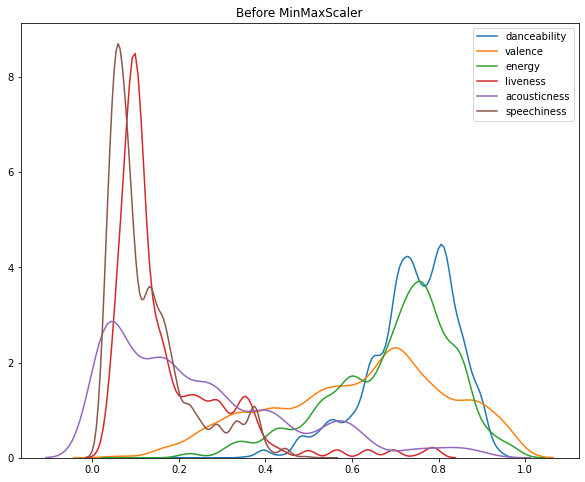

In [151]:
# Features antes de normalizar
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Before MinMaxScaler')

sns.kdeplot(features['danceability'], ax=ax1)
sns.kdeplot(features['valence'], ax=ax1)
sns.kdeplot(features['energy'], ax=ax1)
sns.kdeplot(features['liveness'], ax=ax1)
sns.kdeplot(features['acousticness'], ax=ax1)
sns.kdeplot(features['speechiness'], ax=ax1)
;

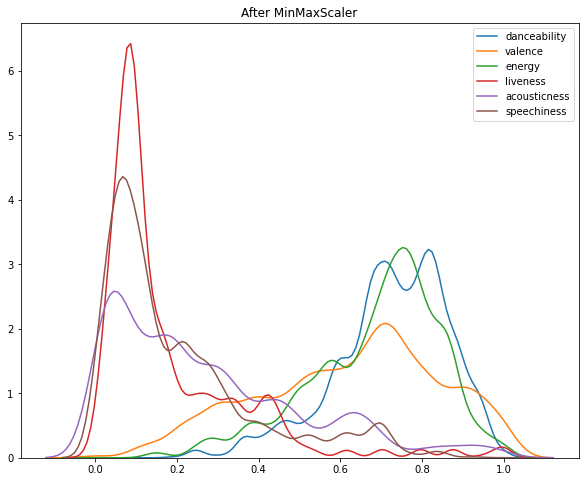

In [152]:
# Normalizar con máximos y mínimos
import seaborn as sns
from sklearn import preprocessing
col_names = list(features.columns)

mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(features)

df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['danceability'], ax=ax1)
sns.kdeplot(df_mm['valence'], ax=ax1)
sns.kdeplot(df_mm['energy'], ax=ax1)
sns.kdeplot(df_mm['liveness'], ax=ax1)
sns.kdeplot(df_mm['acousticness'], ax=ax1)
sns.kdeplot(df_mm['speechiness'], ax=ax1);


In [153]:

data_glo_2020.head()

,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,8,artist_id,artist_followers,artist_popularity
0,3,Tattoo,Rauw Alejandro,380503,2020-03-14,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
1,3,Tattoo,Rauw Alejandro,352148,2020-03-15,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
2,3,Tattoo,Rauw Alejandro,372254,2020-03-16,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
3,3,Tattoo,Rauw Alejandro,374454,2020-03-17,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
4,3,Tattoo,Rauw Alejandro,375102,2020-03-18,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.0,0.0625,-5.144,0.182,0.745,193.896,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91


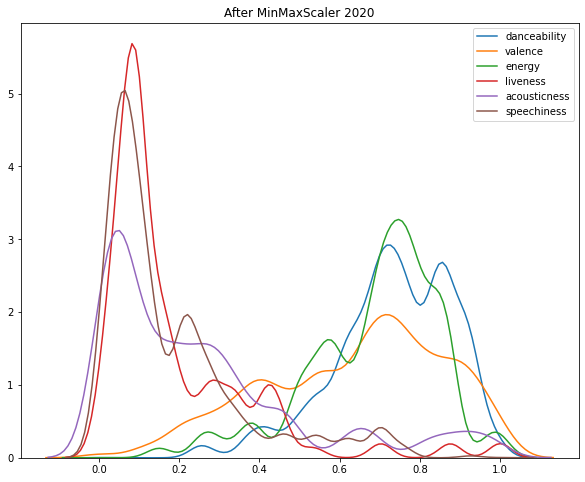

In [184]:
# Comparativo en años
import seaborn as sns
from sklearn import preprocessing
col_names = list(features.columns)

# Datos 2020
data_glo_2020 = data_glo[data_glo['year'] == 2020]

features_2020 = data_glo_2020.drop(columns=['Position', 'Track Name','Artist','Streams', 'date',
                                     'spotify_id', 'year', 'Streamstotal','album', 'release_date', 
                                     'length','tempo', 'time_signature',            'genre1',            'genre2',
                  'genre3',            'genre4',            'genre5',
                  'genre6',            'genre7',            'genre8',
                         8,         'artist_id','artist_followers',
       'artist_popularity'])

mm_scaler = preprocessing.MinMaxScaler()
df_mm_2019 = mm_scaler.fit_transform(features_2020)

df_mm_2019 = pd.DataFrame(df_mm_2019, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler 2020')

sns.kdeplot(df_mm_2019['danceability'], ax=ax1)
sns.kdeplot(df_mm_2019['valence'], ax=ax1)
sns.kdeplot(df_mm_2019['energy'], ax=ax1)
sns.kdeplot(df_mm_2019['liveness'], ax=ax1)
sns.kdeplot(df_mm_2019['acousticness'], ax=ax1)
sns.kdeplot(df_mm_2019['speechiness'], ax=ax1);

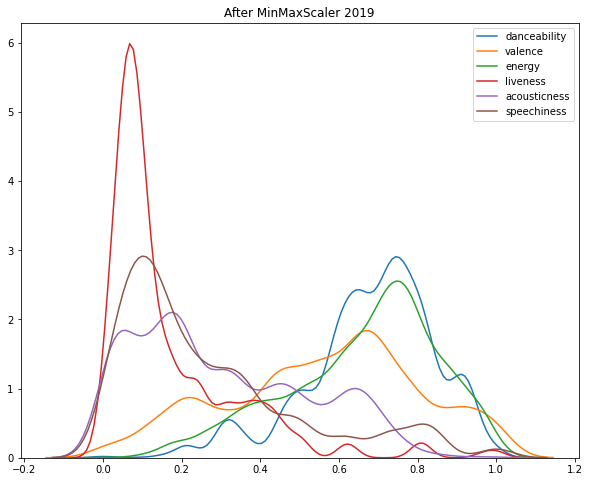

In [183]:
# Datos 2019
data_glo_2019 = data_glo[data_glo['year'] == 2019]
features_2019 = data_glo_2019.drop(columns=['Position', 'Track Name','Artist','Streams', 'date',
                                     'spotify_id', 'year', 'Streamstotal','album', 'release_date', 
                                     'length','tempo', 'time_signature',            'genre1',            'genre2',
                  'genre3',            'genre4',            'genre5',
                  'genre6',            'genre7',            'genre8',
                         8,         'artist_id',  'artist_followers',
       'artist_popularity'])

mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(features_2019)

df_mm_2020 = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler 2019')

sns.kdeplot(df_mm_2020['danceability'], ax=ax1)
sns.kdeplot(df_mm_2020['valence'], ax=ax1)
sns.kdeplot(df_mm_2020['energy'], ax=ax1)
sns.kdeplot(df_mm_2020['liveness'], ax=ax1)
sns.kdeplot(df_mm_2020['acousticness'], ax=ax1)
sns.kdeplot(df_mm_2020['speechiness'], ax=ax1);

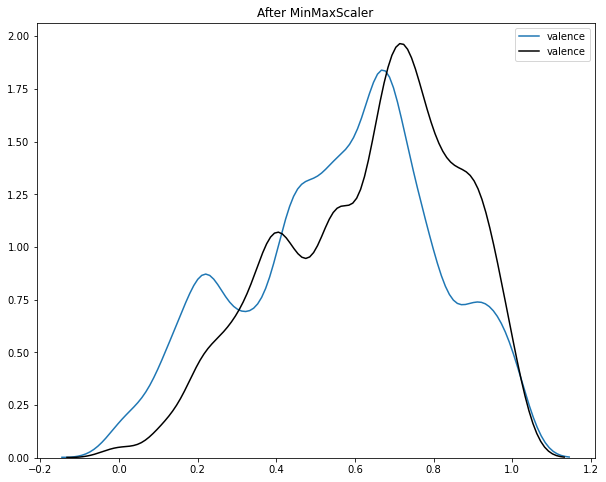

In [156]:
# Comparar un sólo feature entre dos años

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

'''sns.kdeplot(df_mm_2020['danceability'], ax=ax1)
sns.kdeplot(df_mm_2019['danceability'], ax=ax1, color = 'black')

sns.kdeplot(df_mm_2020['liveness'], ax=ax1)
sns.kdeplot(df_mm_2019['liveness'], ax=ax1, color = 'black')
'''
sns.kdeplot(df_mm_2020['valence'], ax=ax1)
sns.kdeplot(df_mm_2019['valence'], ax=ax1, color = 'black')



In [157]:
#Quitando duplicados por artista
data_glo2 = data_glo.drop_duplicates(subset=['Track Name'])
data_glo2

,Position,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,8,artist_id,artist_followers,artist_popularity
0,3,Tattoo,Rauw Alejandro,380503,2020-03-14,7na7Bk98usp84FaOJFPv3d,2020,15640123,Tattoo,2020-02-13,202886,86,0.0217,0.755,0.617,0.000000,0.0625,-5.144,0.1820,0.745,193.896,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
61,15,Fantasias - Remix,Rauw Alejandro,185269,2020-03-14,0A37XY67wSdGqkGjtfW6aV,2020,9217230,Fantasias (Remix) [feat. Farruko & Lunay],2020-03-06,267241,81,0.2060,0.816,0.720,0.000000,0.2770,-4.454,0.0684,0.780,94.004,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
122,56,Elegí (feat. Dímelo Flow),Rauw Alejandro,86925,2020-03-27,50ZC4PM7hywH27RcCfViau,2020,5851456,Elegí (feat. Dímelo Flow),2020-03-26,197721,89,0.2370,0.824,0.631,0.000116,0.0531,-2.791,0.0809,0.678,171.965,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
170,170,Yo Sabía,Rauw Alejandro,37467,2020-04-03,4MejJplHSsSoURz1oTMQ3s,2020,37467,Yo Sabía,2020-04-01,222000,61,0.5770,0.676,0.763,0.000000,0.0952,-2.613,0.1110,0.482,159.997,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
171,134,El Efecto - Remix,Rauw Alejandro,41819,2020-04-12,74j34STf8L6uADnTN69ohv,2020,2398590,El Efecto (Remix),2019-12-13,289898,84,0.1800,0.771,0.769,0.000016,0.3450,-3.504,0.0694,0.931,167.969,4,puerto rican pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1mcTU81TzQhprhouKaTkpq,1713727,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8828,179,Ellos,Ceky Viciny,31018,2019-04-18,1tDUwlIyFFcmfMypYoQ4Ns,2019,2039392,Ellos,2019-03-11,175081,0,0.1240,0.754,0.939,0.002810,0.2930,-1.953,0.0387,0.853,122.006,4,dembow,dominican pop,rap dominicano,NaN,NaN,NaN,NaN,NaN,NaN,5UopXhshFFqRIMfeZrBclq,61297,59
8854,175,Ansiedad y recuerdos (feat. Prok),Denom,34681,2019-04-26,2xfyNgTzByyuTok5bNNkgH,2019,34681,Ansiedad y recuerdos (feat. Prok),2019-04-23,168745,54,0.3150,0.700,0.680,0.000000,0.1200,-5.783,0.3160,0.359,89.976,4,rap espanol,spanish hip hop,trap espanol,NaN,NaN,NaN,NaN,NaN,NaN,0fwnNjAay5ZHP5bAd63g8Y,92958,58
8855,187,Forever Happy,Miky Woodz,30250,2019-04-27,3Q8848wMFrcBiny6lVl4l0,2019,710334,EL OG WEEK,2019-04-12,183093,61,0.2930,0.580,0.716,0.000000,0.1290,-3.928,0.0852,0.509,111.897,5,latin,latin hip hop,reggaeton,reggaeton flow,trap latino,NaN,NaN,NaN,NaN,1pf0MPKfKdvS8J779mS1Ay,1230349,75
8872,106,Dime Cuantas Veces,Micro TDH,46457,2019-05-03,4t8YQE2FIpTIq9SxeuOuuP,2019,314286,Dime Cuantas Veces,2019-04-30,213959,71,0.3350,0.753,0.572,0.000020,0.0858,-6.062,0.3710,0.752,200.007,4,latin,trap venezolano,venezuelan hip hop,NaN,NaN,NaN,NaN,NaN,NaN,1aWJsBQa67l72j1VT3D6Ow,565023,75


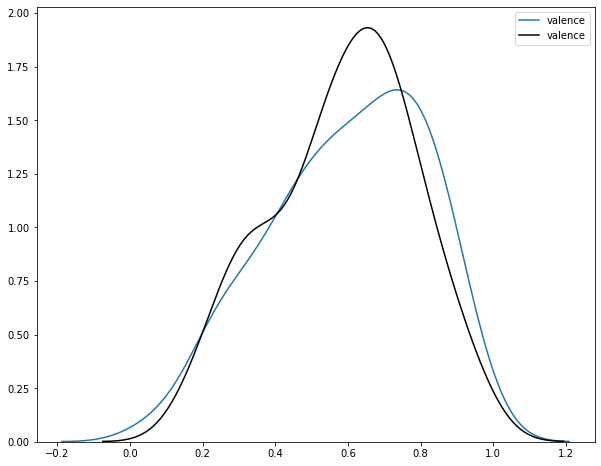

In [ ]:
# Comparar un sólo feature entre dos años sin normalizar


data_glo_2020 = data_glo2[data_glo2['year'] == 2020]
data_glo_2019 = data_glo2[data_glo2['year'] == 2019]

features_nonorm_2020 = data_glo_2020.drop(columns=['Position', 'Track Name','Artist','Streams', 'date',
                                     'spotify_id', 'year', 'Streamstotal','album', 'release_date', 
                                     'length','tempo', 'time_signature',            'genre1',            'genre2',
                  'genre3',            'genre4',            'genre5',
                  'genre6',            'genre7',            'genre8',
                         8,         'artist_id',  'artist_followers',
       'artist_popularity'])

features_nonorm_2019 = data_glo_2019.drop(columns=['Position', 'Track Name','Artist','Streams', 'date',
                                     'spotify_id', 'year', 'Streamstotal','album', 'release_date', 
                                     'length','tempo', 'time_signature',            'genre1',            'genre2',
                  'genre3',            'genre4',            'genre5',
                  'genre6',            'genre7',            'genre8',
                         8,         'artist_id',  'artist_followers',
       'artist_popularity'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))

'''sns.kdeplot(df_mm_2020['danceability'], ax=ax1)
sns.kdeplot(df_mm_2019['danceability'], ax=ax1, color = 'black')

sns.kdeplot(df_mm_2020['liveness'], ax=ax1)
sns.kdeplot(df_mm_2019['liveness'], ax=ax1, color = 'black')


sns.kdeplot(features_nonorm_2020['danceability'], ax=ax1)
sns.kdeplot(features_nonorm_2019['danceability'], ax=ax1, color = 'black')
'''
sns.kdeplot(features_nonorm_2020['valence'], ax=ax1)
sns.kdeplot(features_nonorm_2019['valence'], ax=ax1, color = 'black')



In [188]:
df

,2019,2020
2020,0.608873,0.63255
2019,0.608873,0.63255


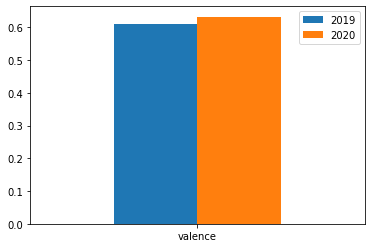

In [192]:
#con datos normalizados, calcular medias de años. para las features
data_mean_2020 = features_2020['valence'].mean()
data_mean_2019 = features_2019['valence'].mean()

index = ['valence']

df = pd.DataFrame({'2019': data_mean_2019, '2020': data_mean_2020}, index=index)
ax = df.plot.bar(rot=0)

# Ojo, habria que calcular la media ponderada!!!

,2019,2020
popularity,60.864411,75.822428
acousticness,0.265211,0.227871
danceability,0.754419,0.726861
energy,0.696411,0.695638
instrumentalness,0.009257,0.028039
liveness,0.167393,0.174585
loudness,-4.948771,-5.160490
speechiness,0.139117,0.114732
valence,0.608873,0.632550


popularity          55.519380
acousticness         0.269807
danceability         0.732860
energy               0.680008
instrumentalness     0.023659
liveness             0.165828
loudness            -5.579209
speechiness          0.131754
valence              0.585008
dtype: float64

In [ ]:
'''# Mi prueba que al final sale bien!!!!! Peeeeero, cómo hago para que en vez de uno, pase una lista de canciones?? SIN TOCAR
API_LIMIT = 50

number_of_tracks = 2000
artist = ['Earth, Wind & Fire']

search_runs = int(number_of_tracks / API_LIMIT)

search_list = []
for i in range(search_runs):
    print("Call #{} for tracks".format(i+1))
    search_results = sp.search(q = 'artist:"{}"'.format(artist), type="artist",  limit=API_LIMIT, offset=API_LIMIT*i)

    search_list += [[t["id"], t["name"], t["genres"], t['followers']['total'], t['popularity']] for t in search_results['artists']['items']]

df_search = pd.DataFrame(search_list, columns=["id", "name", "genres", 'followers', 'popularity'])
df_search.head()
'''

''' OTRO SCRIPT
def _get_features_df(sp, track_ids):
    """
    This is an helper method to get track's features with pagination from track ids.
    It returns a Pandas dataframe
    """

    feature_list = []
    i = 0
    while track_ids:
        print("Call #{} for audio features".format(i + 1))
        features_results = sp.audio_features(track_ids[:API_LIMIT])

        feature_list += features_results
        
        track_ids = track_ids[API_LIMIT:]
        i += 1
    return feature_list

_get_features_df(sp, '7k4t7uLgtOxPwTpFmtJNTY')
'''

''' OTRO SCRIPT #PAra obtener los artists id
def _get_artists_df(sp, artist_ids):
    """
    This is an helper method to get artist's information with pagination from artist ids.
    It returns a Pandas dataframe
    """

    artist_list = []
    i = 0

    while artist_ids:
        print("Call #{} for artists".format(i + 1))
        artists_results = sp.artists(artist_ids[:API_LIMIT])

        artist_list += [[t["id"], t["genres"], t["popularity"]] for t in artists_results["artists"]]

        artist_ids = artist_ids[API_LIMIT:]
        i += 1

    df_artists = pd.DataFrame(artist_list, columns=["artist_id", "artist_genres", "artist_popularity"])

    df_artists["artist_popularity_norm"] = df_artists["artist_popularity"] / 100.

    return df_artists

# https://github.com/jvichare/rshiny-music-visualization/blob/master/Spotify%20Song%20Query.ipynb

'''

'''# Este script coge los artistas con un determinado genre, EL ORGINAL
API_LIMIT = 50

number_of_tracks = 2000
genre = 'jazz'

search_runs = int(number_of_tracks / API_LIMIT)

search_list = []
for i in range(search_runs):
    print("Call #{} for tracks".format(i+1))
    search_results = sp.search('genre:"{}"'.format(genre), type="track",  limit=API_LIMIT, offset=API_LIMIT*i)

    search_list += [[t["id"], t["name"], t["artists"][0]["id"], t["artists"][0]["name"],
                            t["album"]["name"], t["popularity"]]
                           for t in search_results['tracks']['items']]

df_search = pd.DataFrame(search_list, 
                         columns=["id", "song_name", "artist_id", "artist_name", "album_name", "popularity"])
df_search["popularity_norm"] = df_search["popularity"] / 100.
df_search.head()
'''

'# Este script coge los artistas con un determinado genre, EL ORGINAL\nAPI_LIMIT = 50\n\nnumber_of_tracks = 2000\ngenre = \'jazz\'\n\nsearch_runs = int(number_of_tracks / API_LIMIT)\n\nsearch_list = []\nfor i in range(search_runs):\n    print("Call #{} for tracks".format(i+1))\n    search_results = sp.search(\'genre:"{}"\'.format(genre), type="track",  limit=API_LIMIT, offset=API_LIMIT*i)\n\n    search_list += [[t["id"], t["name"], t["artists"][0]["id"], t["artists"][0]["name"],\n                            t["album"]["name"], t["popularity"]]\n                           for t in search_results[\'tracks\'][\'items\']]\n\ndf_search = pd.DataFrame(search_list, \n                         columns=["id", "song_name", "artist_id", "artist_name", "album_name", "popularity"])\ndf_search["popularity_norm"] = df_search["popularity"] / 100.\ndf_search.head()\n'